<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Year


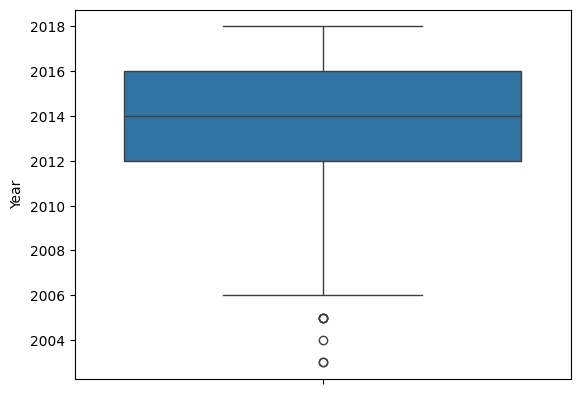

Selling_Price


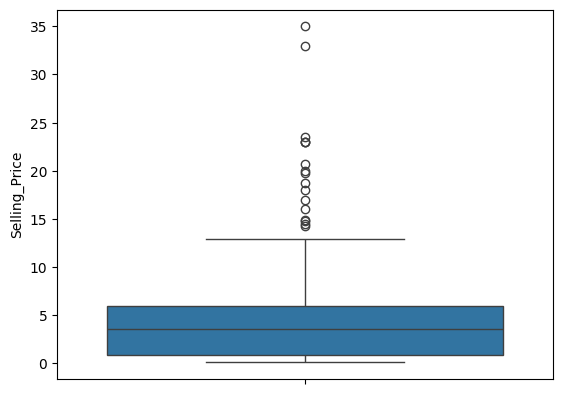

Present_Price


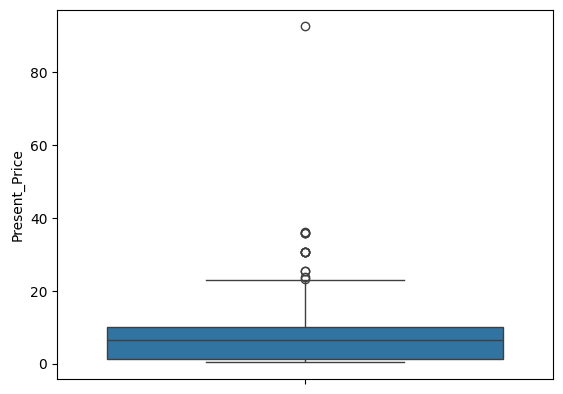

Driven_kms


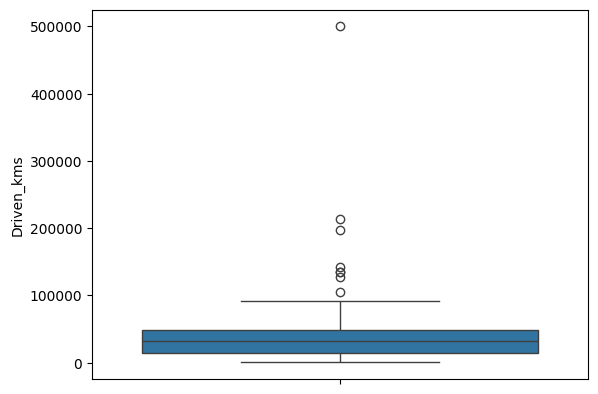

Owner


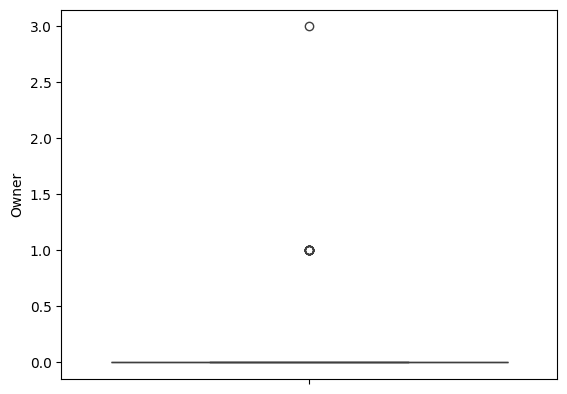

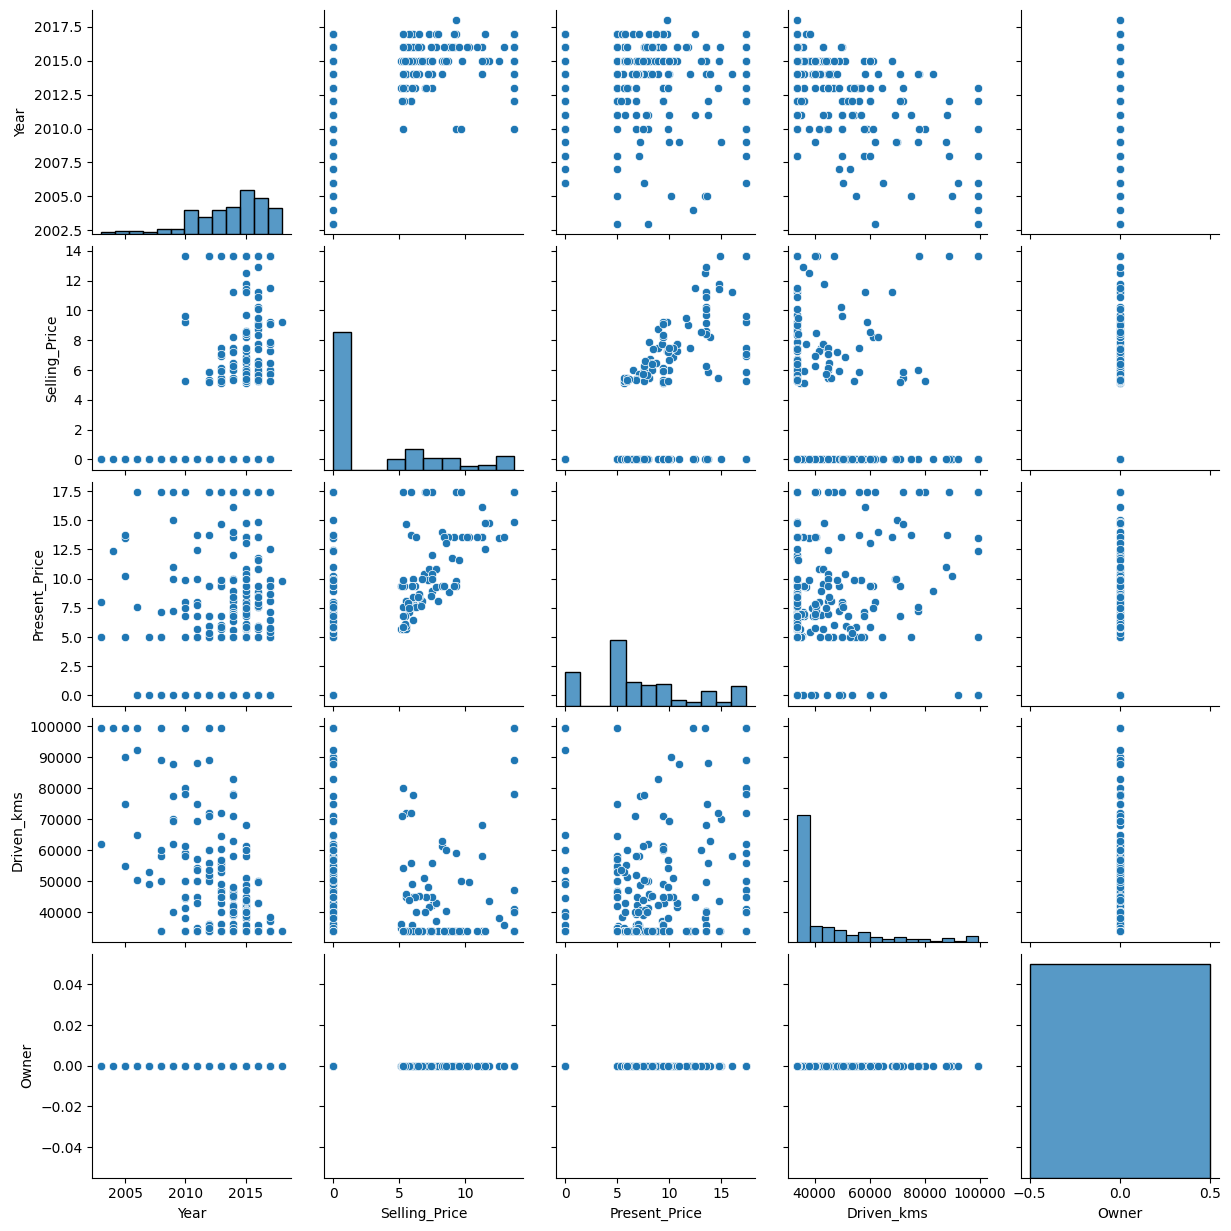

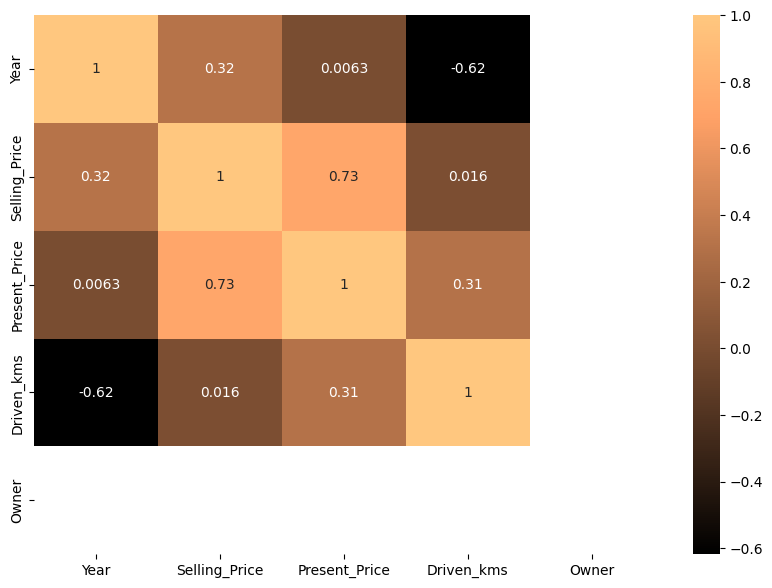

Training Accuracy: 0.8757467483692816
----------------------------------------------------------
Mean squared errror 0.0028676305950779187
-----------------------------------------------------------
R squared: 0.877334475770733


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

path="/content/drive/MyDrive/Oasis DS/car data.csv"
df=pd.read_csv(path)

df

df.head()

df.tail()

df.isnull().sum()

df.shape

df.info()

df["Present_Price"].describe()

df.describe()

df.columns

df.isna().sum()

df.duplicated().sum()

df

num=df[['Year','Selling_Price','Present_Price','Driven_kms','Owner']]
cat=df[['Car_Name','Fuel_Type','Selling_type','Transmission']]

for i in num:
  print(i)
  sns.boxplot(data=df[i])
  plt.show()

for i in num:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)

  IQR=Q3-Q1
  low=Q3-Q1
  up=Q3+1.5*IQR

  for j in df[i]:
    if j<=low:
      df=df.replace(j,low)
    if j>=up:
      df=df.replace(j,up)

sns.pairplot(data=df)
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True,cmap='copper')
plt.show()

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in cat:
  cat[i] = encoder.fit_transform(df[i])

cat

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(num)
cols=num.columns
scaled_dataset=pd.DataFrame(scaled_data,columns=cols)

df=pd.concat([cat,scaled_dataset],axis=1)

df

from sklearn.model_selection import train_test_split
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

x_train.shape,y_train.shape

x_test.shape,y_test.shape

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
print('Training Accuracy:',model.score(x_train,y_train))
print('----------------------------------------------------------')
print("Mean squared errror",mean_squared_error(y_test,y_pred))
print('-----------------------------------------------------------')
print("R squared:",r2_score(y_test,y_pred))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')